<a href="https://colab.research.google.com/github/muralikrishnan2022/Energy_Consumption_Analysis/blob/main/ARIMA_MODEL_BASED_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
import os
os.listdir()

['.config', 'drive', 'AEP_hourly.csv', 'sample_data']

In [ ]:
data = pd.read_csv("/content/AEP_hourly.csv")
data['Datetime'] = pd.to_datetime(data['Datetime'])
data = data.set_index('Datetime')

In [ ]:
data.isnull().sum()

AEP_MW    0
dtype: int64

In [ ]:
# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

In [ ]:
# Define ARIMA model parameters
p = 5  # AR parameter
d = 1  # Differencing order
q = 1  # MA parameter

In [ ]:
# Fit ARIMA model
arima_model = ARIMA(train_data, order=(p, d, q))
arima_result = arima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [ ]:
# Forecast
forecast = arima_result.forecast(steps=len(test_data))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Squared Error: 6972871.594877272


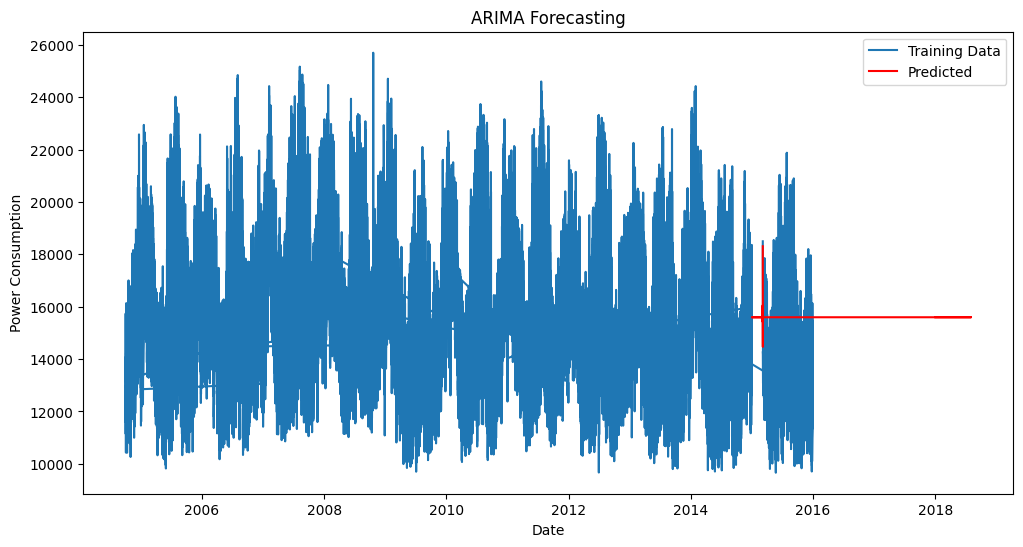

In [ ]:
# Evaluate model
mse = mean_squared_error(test_data, forecast)
print("Mean Squared Error:", mse)

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, forecast, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.title('ARIMA Forecasting')
plt.legend()
plt.show()

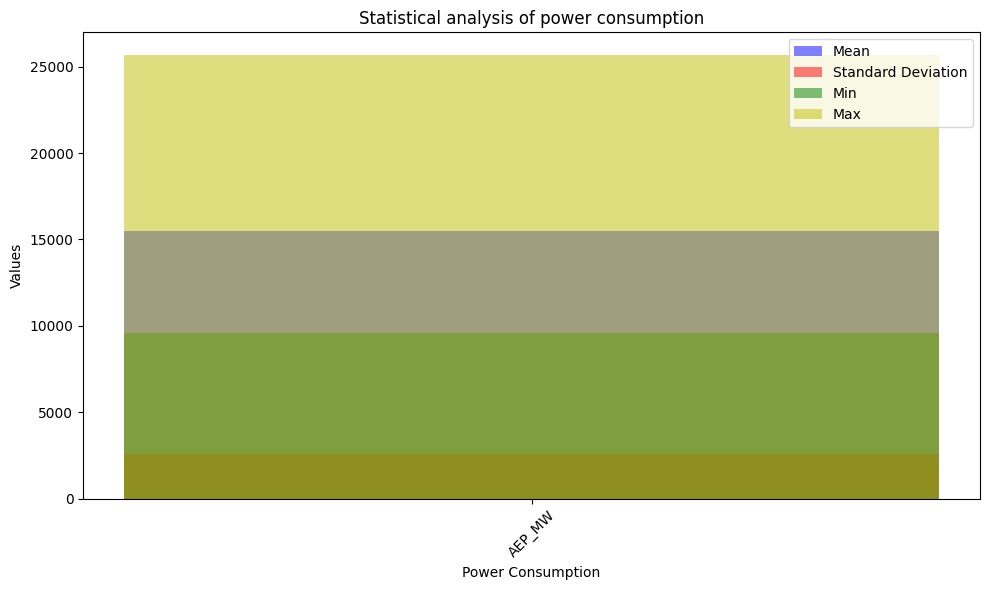

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with numerical columns

# Calculate mean, standard deviation, min, and max values for each numerical column
mean_values = data.mean()
std_deviation = data.std()
min_values = data.min()
max_values = data.max()

# Plot the statistics
plt.figure(figsize=(10, 6))

# Plot mean values
plt.bar(mean_values.index, mean_values, color='b', alpha=0.5, label='Mean')

# Plot standard deviation values
plt.bar(std_deviation.index, std_deviation, color='r', alpha=0.5, label='Standard Deviation')

# Plot min values
plt.bar(min_values.index, min_values, color='g', alpha=0.5, label='Min')

# Plot max values
plt.bar(max_values.index, max_values, color='y', alpha=0.5, label='Max')

# Add labels and title
plt.xlabel('Power Consumption')
plt.ylabel('Values')
plt.title('Statistical analysis of power consumption')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()
